# Walmart Sales Analysis

## Data loading

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('walmart_cleaned.csv')
#print(df.head())

df = pd.DataFrame(df)

## Inspect data structure
This dataset includes 17 columns and 421570 rows.<br>
The column "Date" is in object type, and all other columns are in numeric type.<br>
The column "IsHoliday" is a dummy variable with 1 means holiday and 0 means not holiday.<br>
There is no missing values in the dataset.<br>

In [95]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

## Detect and treat outliers
Box plot and Z-socre are used to identify outliers for numeric columns in the dataset. It is not easy to identify outliers for putting all numberic columns in a single Box plot; therefore, I drew Box plot for each numeric columns.<br>
From Box plot graphs, I found outliers in these columns: Weekly_Sales, Temperature, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, and Unemployment.<br>
The results from Z-score also confirmed my fingdings about outliers. I checked the numbers of rows in each numeric columns, where the abslute value of Z-socre is greater than 3. The results show that "Unemployment" has the 13756 rows are considered as outlier, "Weekly_Sales" is the second highest column in terms of outliers.<br>
Please note: "IsHoliday" column has 29661 rows where absolute value of Z-score are greater than 3, but "IsHoliday" is a dummy variable, so no outlier should be considered there.
In addition, I decided to keep outliers in this anaysis because the amount of outliers are relatively large. These outliers may provide insight for the analysis.


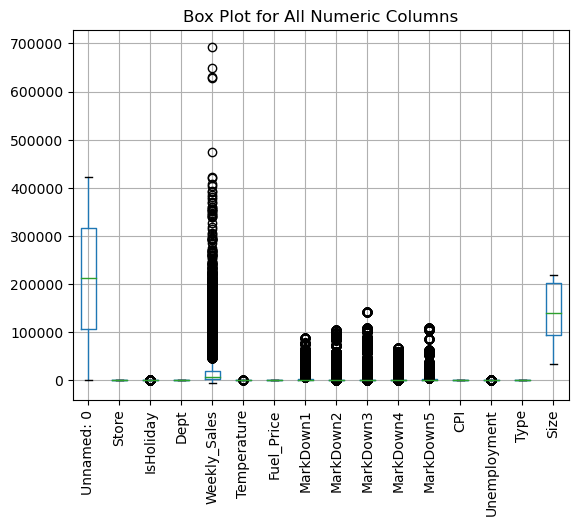

In [96]:
# Box plot for all numeric columns
df.boxplot()
plt.title("Box Plot for All Numeric Columns")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if necessary
plt.show()

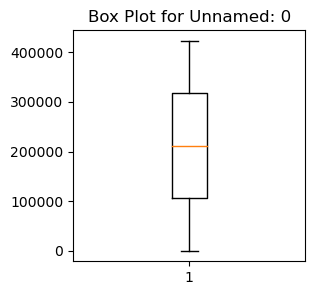

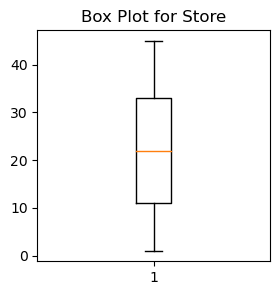

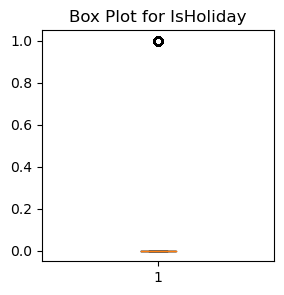

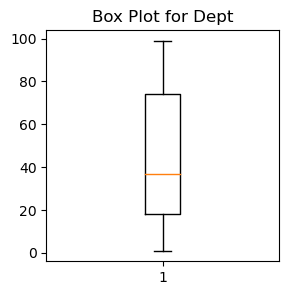

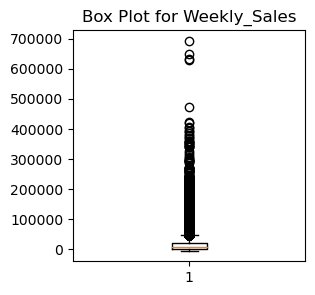

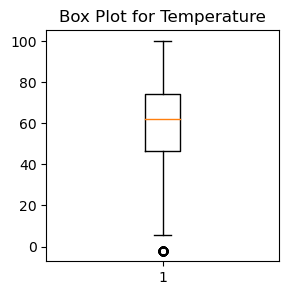

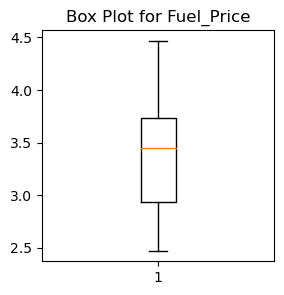

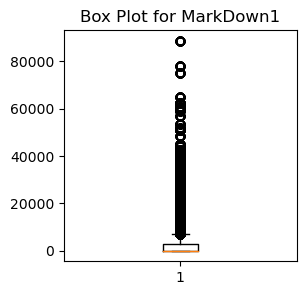

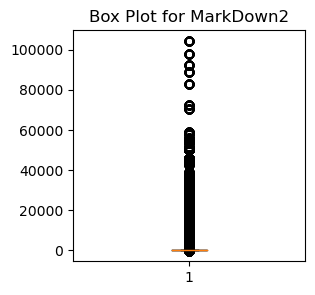

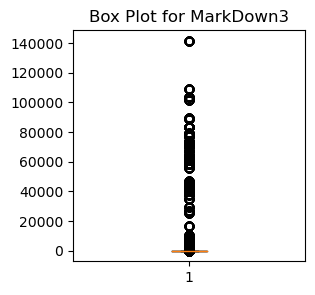

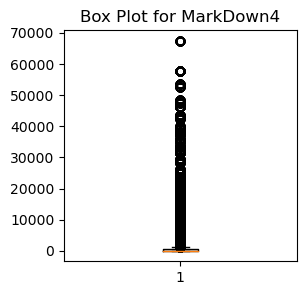

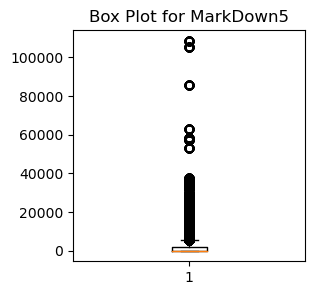

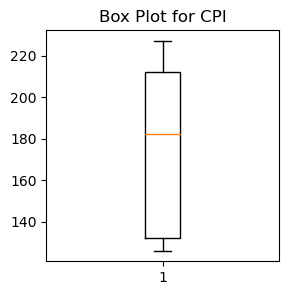

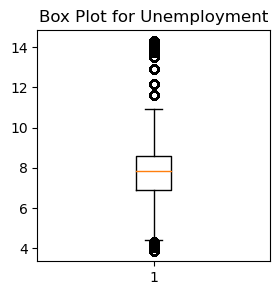

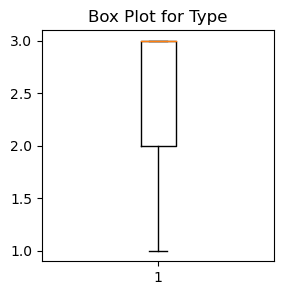

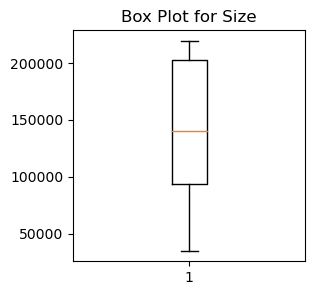

In [97]:
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [98]:
import pandas as pd
from scipy.stats import zscore

# Apply zscore to numeric columns only
numeric_columns = df.select_dtypes(include=['number'])
df_zscores = numeric_columns.apply(zscore)

print(df_zscores)

        Unnamed: 0     Store  IsHoliday      Dept  Weekly_Sales  Temperature  \
0        -1.731751 -1.658199  -0.275106 -1.418742      0.393782    -0.963798   
1        -1.731743 -1.658199  -0.275106 -0.598856     -0.186875    -0.963798   
2        -1.731735 -1.658199  -0.275106 -0.894015     -0.121416    -0.963798   
3        -1.731726 -1.658199  -0.275106  0.024258     -0.702026    -0.963798   
4        -1.731718 -1.658199  -0.275106 -0.533265     -0.655888    -0.963798   
...            ...       ...        ...       ...           ...          ...   
421565    1.732229  1.783258  -0.275106 -1.025197      0.451711    -0.067219   
421566    1.732237  1.783258  -0.275106 -0.926810     -0.586550    -0.067219   
421567    1.732245  1.783258  -0.275106 -0.402083     -0.521758    -0.067219   
421568    1.732253  1.783258  -0.275106  1.270486     -0.672068    -0.067219   
421569    1.732261  1.783258  -0.275106  1.762418     -0.656262    -0.067219   

        Fuel_Price  MarkDown1  MarkDown

In [99]:
# Count rows where |Z| > 3 for each column
outlier_counts = (df_zscores.abs() > 3).sum()
print("Number of rows with |Z| > 3 for each column:")
print(outlier_counts)

Number of rows with |Z| > 3 for each column:
Unnamed: 0          0
Store               0
IsHoliday       29661
Dept                0
Weekly_Sales     8848
Temperature        69
Fuel_Price          0
MarkDown1        8723
MarkDown2        5655
MarkDown3        2773
MarkDown4        6731
MarkDown5        5455
CPI                 0
Unemployment    13756
Type                0
Size                0
dtype: int64


## Aggregate sales data by time periods

In [100]:
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Aggregate by week
weekly_sales = (df.groupby(['Store', 'Dept'])['Weekly_Sales'].resample('W').sum().reset_index())
print(weekly_sales)

        Store  Dept       Date  Weekly_Sales
0           1   1.0 2010-02-07      24924.50
1           1   1.0 2010-02-14      46039.49
2           1   1.0 2010-02-21      41595.55
3           1   1.0 2010-02-28      19403.54
4           1   1.0 2010-03-07      21827.90
...       ...   ...        ...           ...
449232     45  98.0 2012-09-30        508.37
449233     45  98.0 2012-10-07        628.10
449234     45  98.0 2012-10-14       1061.02
449235     45  98.0 2012-10-21        760.01
449236     45  98.0 2012-10-28       1076.80

[449237 rows x 4 columns]


In [101]:
# Aggregate by week
weekly_sales = (df.groupby(['Store', 'Dept'])['Weekly_Sales'].resample('M').sum().reset_index())
print(weekly_sales)

        Store  Dept       Date  Weekly_Sales
0           1   1.0 2010-02-28     131963.08
1           1   1.0 2010-03-31      91237.14
2           1   1.0 2010-04-30     150516.76
3           1   1.0 2010-05-31      66694.15
4           1   1.0 2010-06-30      66740.70
...       ...   ...        ...           ...
103935     45  98.0 2012-06-30       3757.63
103936     45  98.0 2012-07-31       2857.79
103937     45  98.0 2012-08-31       2505.55
103938     45  98.0 2012-09-30       1934.07
103939     45  98.0 2012-10-31       3525.93

[103940 rows x 4 columns]


## Exploratory Data Analysis (EDA)

### Line plots for sales trends (weekly and monthly)

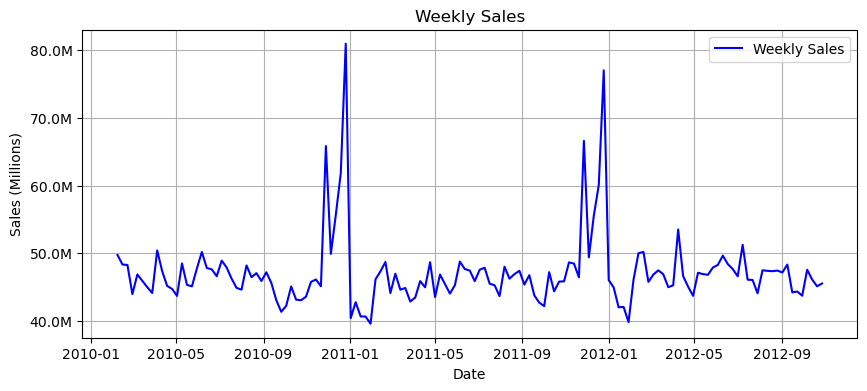

In [102]:
import matplotlib.ticker as ticker

# Aggregate weekly sales
weekly = df.resample('W')['Weekly_Sales'].sum()
#print(weekly)

plt.figure(figsize=(10, 4))
plt.plot(weekly.index, weekly.values, color='blue', label='Weekly Sales')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()

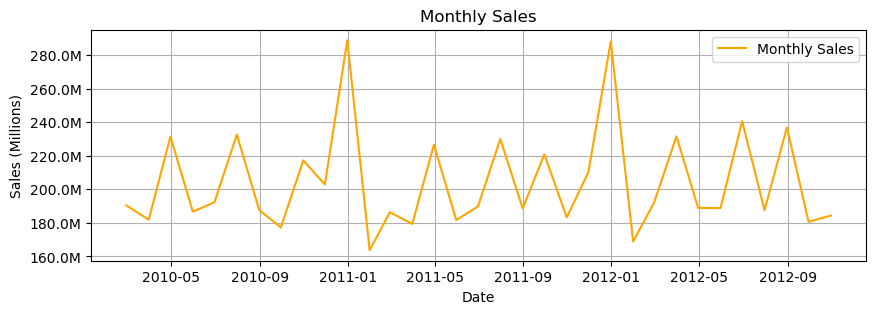

In [103]:
import matplotlib.ticker as ticker

# Aggregate monthly sales
monthly = df.resample('M')['Weekly_Sales'].sum()
#print(monthly)

plt.figure(figsize=(10, 3))
plt.plot(monthly.index, monthly.values, color='orange', label='Monthly Sales')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()

## Compare sales in holiday vs. non-holiday weeks

In [104]:
# Aggregate sales by holiday and non-holiday weeks
sales_summary = df.groupby('IsHoliday')['Weekly_Sales'].sum().reset_index()
sales_summary['IsHoliday'] = sales_summary['IsHoliday'].map({1: 'Holiday', 0: 'Non-Holiday'})
print(sales_summary)

     IsHoliday  Weekly_Sales
0  Non-Holiday  6.231919e+09
1      Holiday  5.052996e+08


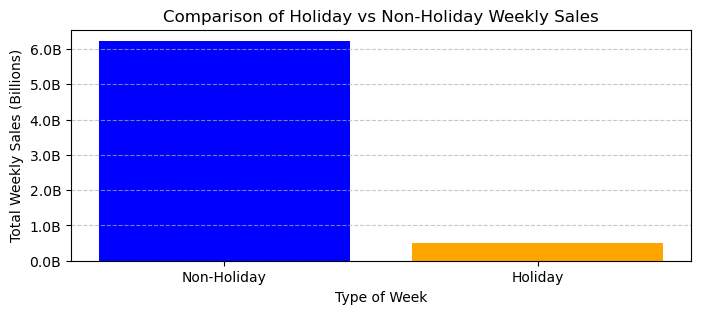

In [105]:
# Bar chart to compare sales
plt.figure(figsize=(8, 3))
plt.bar(sales_summary['IsHoliday'], sales_summary['Weekly_Sales'], color=['blue', 'orange'])

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000_000:.1f}B'))

plt.title('Comparison of Holiday vs Non-Holiday Weekly Sales')
plt.xlabel('Type of Week')
plt.ylabel('Total Weekly Sales (Billions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Rank the top 10 stores and departments based on total sales

In [106]:
# Aggregate sales by store
store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
print(store)

    Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813

In [107]:
top_10_stores = store.sort_values(by='Weekly_Sales', ascending=False).head(10)

print(top_10_stores)

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


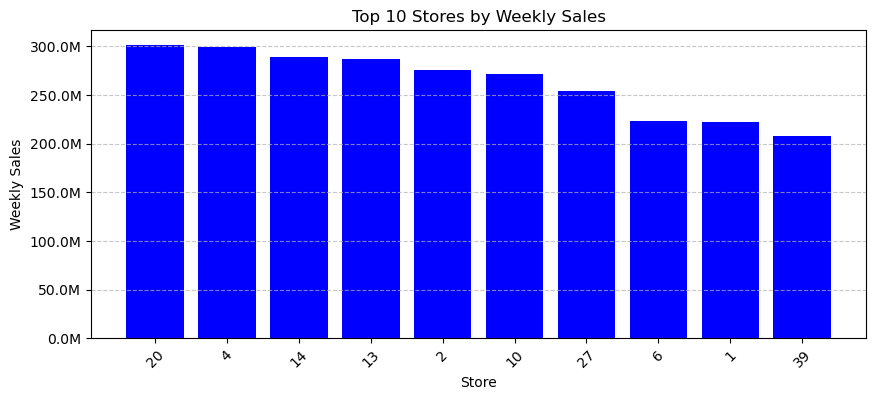

In [108]:
# Bar chart for top 10 stores
plt.figure(figsize=(10, 4))
plt.bar(top_10_stores['Store'].astype(str), top_10_stores['Weekly_Sales'], color='blue')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.title('Top 10 Stores by Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [109]:
# Aggregate department by store
dept = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()
print(dept)

    Dept  Weekly_Sales
0    1.0  1.236388e+08
1    2.0  2.806112e+08
2    3.0  7.589245e+07
3    4.0  1.671467e+08
4    5.0  1.356074e+08
..   ...           ...
76  95.0  4.493202e+08
77  96.0  7.383392e+07
78  97.0  8.949651e+07
79  98.0  3.982892e+07
80  99.0  3.581498e+05

[81 rows x 2 columns]


In [110]:
top_10_dept = dept.sort_values(by='Weekly_Sales', ascending=False).head(10)

print(top_10_dept)

    Dept  Weekly_Sales
73  92.0  4.839433e+08
76  95.0  4.493202e+08
36  38.0  3.931181e+08
60  72.0  3.057252e+08
71  90.0  2.910685e+08
38  40.0  2.889360e+08
1    2.0  2.806112e+08
72  91.0  2.167817e+08
12  13.0  1.973216e+08
7    8.0  1.942808e+08


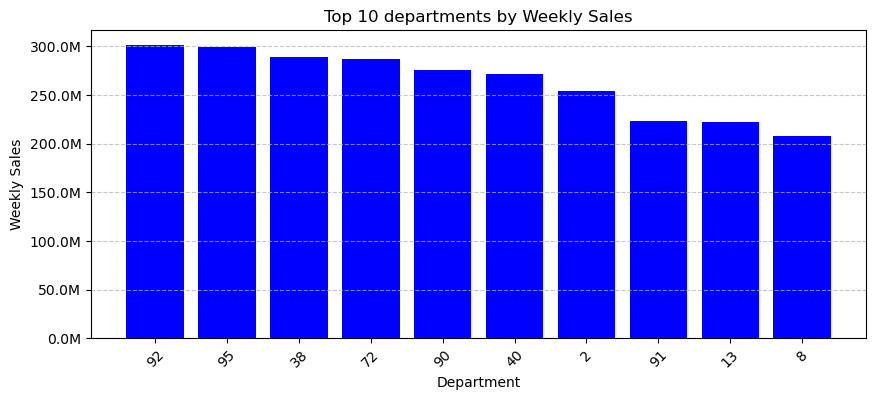

In [111]:
# Convert 'Weekly_Sales' from float64 to int64
top_10_dept['Dept'] = top_10_dept['Dept'].astype('int64')

# Bar chart for top 10 departments
plt.figure(figsize=(10, 4))
plt.bar(top_10_dept['Dept'].astype(str), top_10_stores['Weekly_Sales'], color='blue')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.title('Top 10 departments by Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Identify sparse time series with irregular data

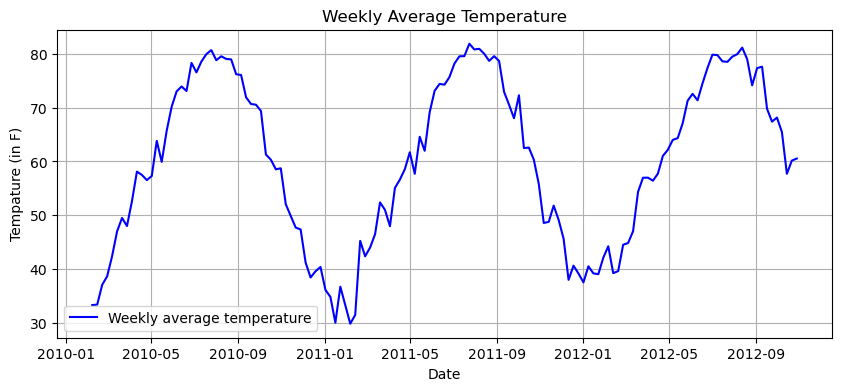

In [112]:
temperature = df.resample('W')['Temperature'].mean()

plt.figure(figsize=(10, 4))
plt.plot(temperature.index, temperature.values, color='blue', label='Weekly average temperature')

plt.title('Weekly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Tempature (in F)')
plt.legend()
plt.grid(True)
plt.show()


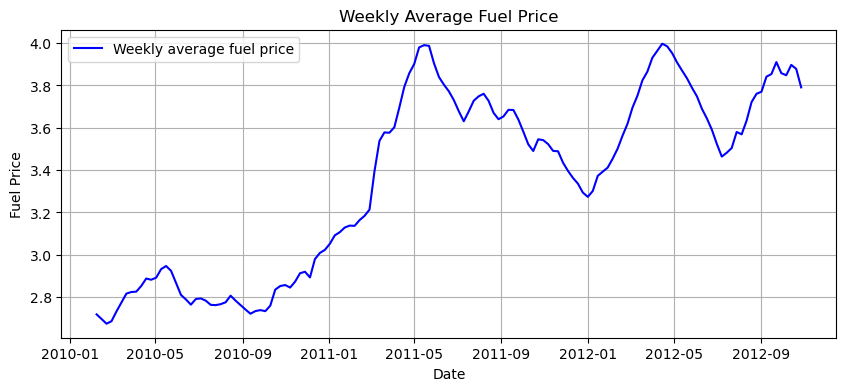

In [113]:
fuel = df.resample('W')['Fuel_Price'].mean()

plt.figure(figsize=(10, 4))
plt.plot(fuel.index, fuel.values, color='blue', label='Weekly average fuel price')

plt.title('Weekly Average Fuel Price')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.legend()
plt.grid(True)
plt.show()


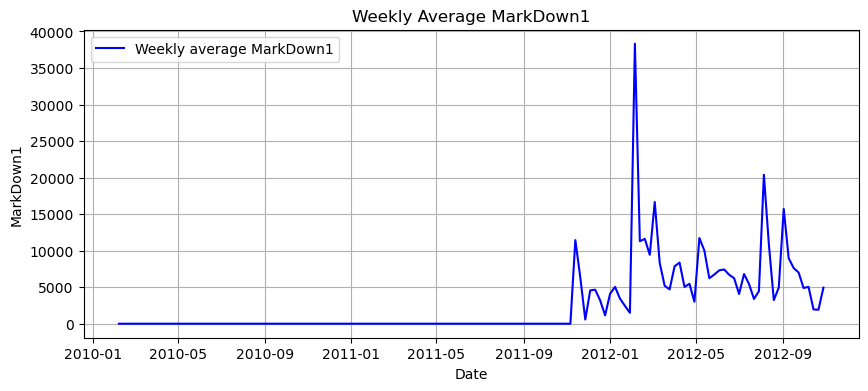

In [114]:
markdown1 = df.resample('W')['MarkDown1'].mean()

plt.figure(figsize=(10, 4))
plt.plot(markdown1.index, markdown1.values, color='blue', label='Weekly average MarkDown1')

plt.title('Weekly Average MarkDown1')
plt.xlabel('Date')
plt.ylabel('MarkDown1')
plt.legend()
plt.grid(True)
plt.show()

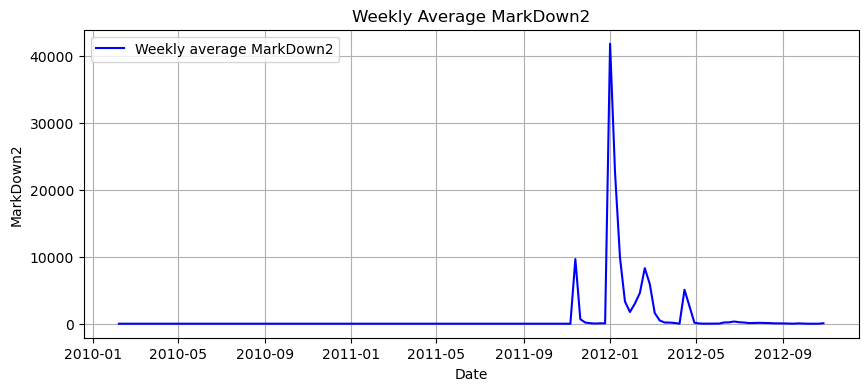

In [115]:
markdown2 = df.resample('W')['MarkDown2'].mean()

plt.figure(figsize=(10, 4))
plt.plot(markdown2.index, markdown2.values, color='blue', label='Weekly average MarkDown2')

plt.title('Weekly Average MarkDown2')
plt.xlabel('Date')
plt.ylabel('MarkDown2')
plt.legend()
plt.grid(True)
plt.show()

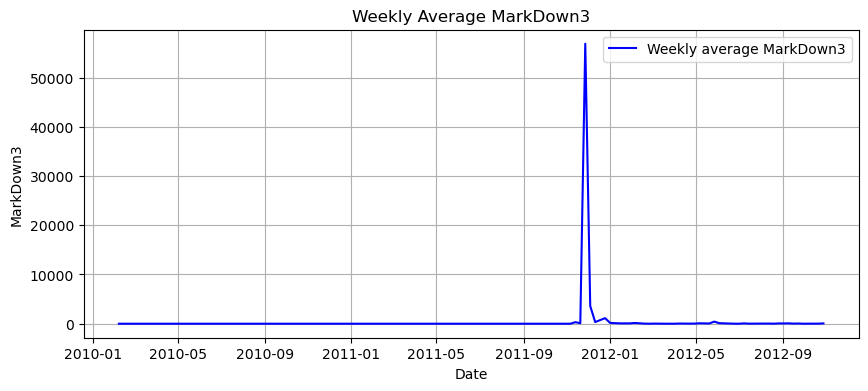

In [116]:
markdown3 = df.resample('W')['MarkDown3'].mean()

plt.figure(figsize=(10, 4))
plt.plot(markdown3.index, markdown3.values, color='blue', label='Weekly average MarkDown3')

plt.title('Weekly Average MarkDown3')
plt.xlabel('Date')
plt.ylabel('MarkDown3')
plt.legend()
plt.grid(True)
plt.show()

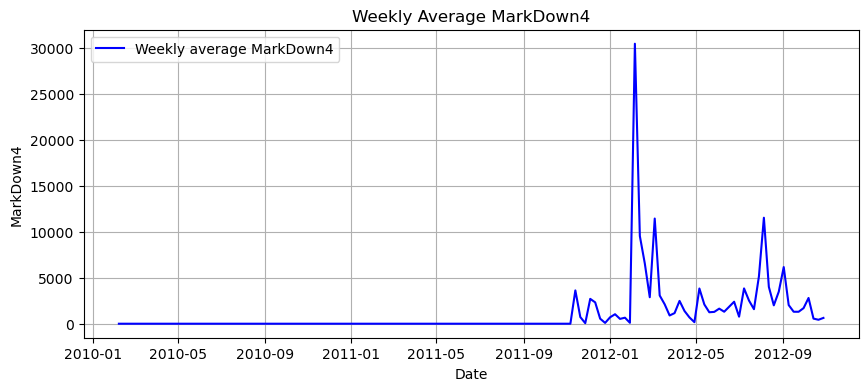

In [117]:
markdown4 = df.resample('W')['MarkDown4'].mean()

plt.figure(figsize=(10, 4))
plt.plot(markdown4.index, markdown4.values, color='blue', label='Weekly average MarkDown4')

plt.title('Weekly Average MarkDown4')
plt.xlabel('Date')
plt.ylabel('MarkDown4')
plt.legend()
plt.grid(True)
plt.show()

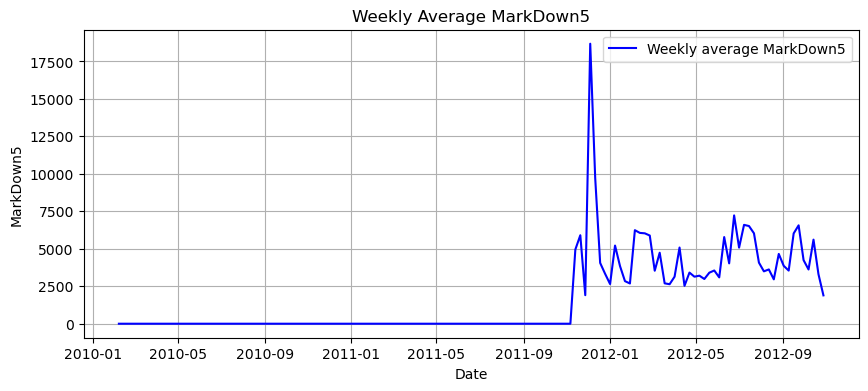

In [118]:
markdown5 = df.resample('W')['MarkDown5'].mean()

plt.figure(figsize=(10, 4))
plt.plot(markdown5.index, markdown5.values, color='blue', label='Weekly average MarkDown5')

plt.title('Weekly Average MarkDown5')
plt.xlabel('Date')
plt.ylabel('MarkDown5')
plt.legend()
plt.grid(True)
plt.show()

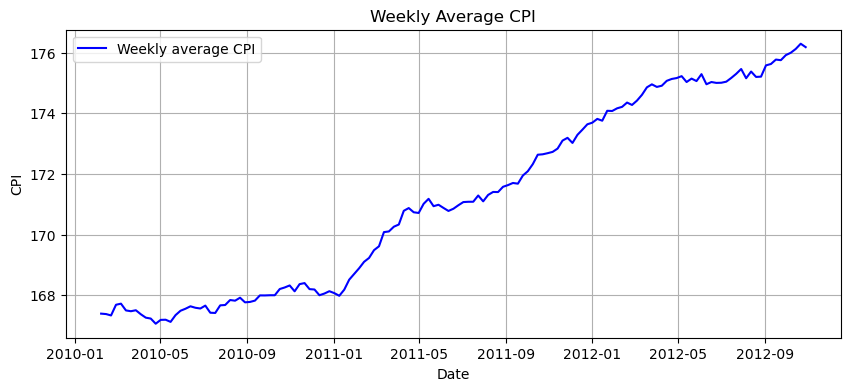

In [119]:
cpi = df.resample('W')['CPI'].mean()

plt.figure(figsize=(10, 4))
plt.plot(cpi.index, cpi.values, color='blue', label='Weekly average CPI')

plt.title('Weekly Average CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

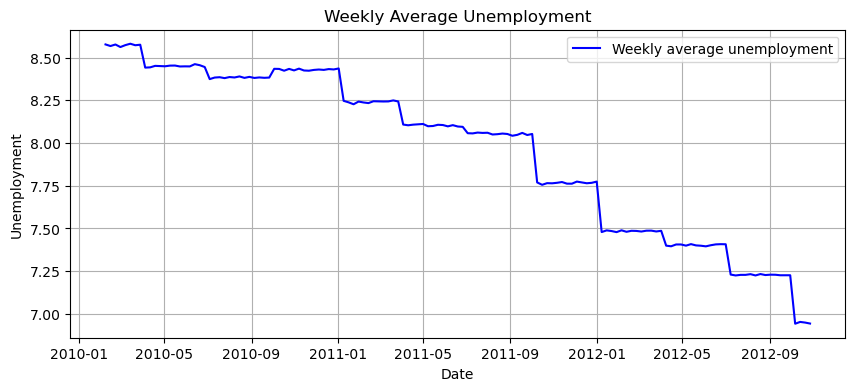

In [120]:
unemployment = df.resample('W')['Unemployment'].mean()

plt.figure(figsize=(10, 4))
plt.plot(unemployment.index, unemployment.values, color='blue', label='Weekly average unemployment')

plt.title('Weekly Average Unemployment')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()

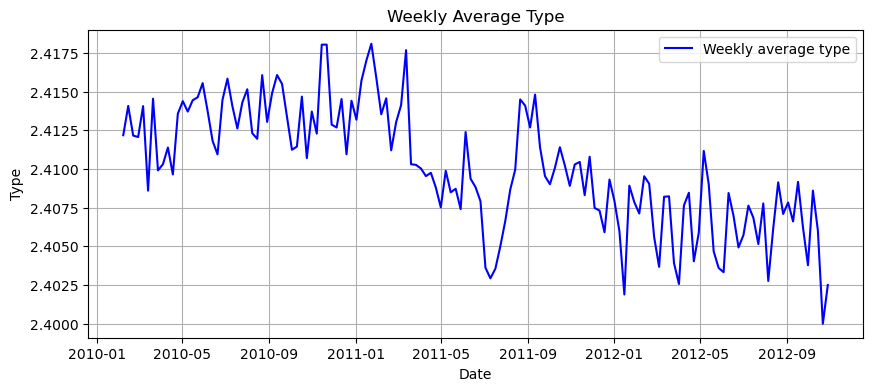

In [121]:
type_ = df.resample('W')['Type'].mean()

plt.figure(figsize=(10, 4))
plt.plot(type_.index, type_.values, color='blue', label='Weekly average type')

plt.title('Weekly Average Type')
plt.xlabel('Date')
plt.ylabel('Type')
plt.legend()
plt.grid(True)
plt.show()

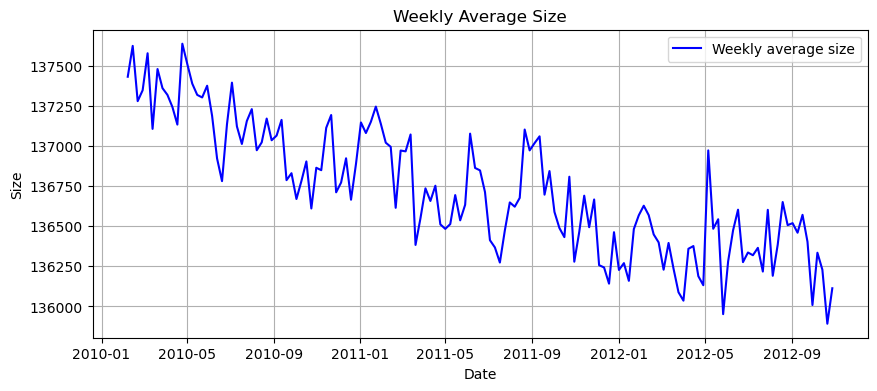

In [122]:
size = df.resample('W')['Size'].mean()

plt.figure(figsize=(10, 4))
plt.plot(size.index, size.values, color='blue', label='Weekly average size')

plt.title('Weekly Average Size')
plt.xlabel('Date')
plt.ylabel('Size')
plt.legend()
plt.grid(True)
plt.show()

## Perform correlation analysis to explore relationship between sales and external factors

In [123]:
# Calculate correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

              Unnamed: 0     Store  IsHoliday      Dept  Weekly_Sales  \
Unnamed: 0      1.000000  0.999205  -0.000844  0.023985     -0.084507   
Store           0.999205  1.000000  -0.000548  0.024004     -0.085195   
IsHoliday      -0.000844 -0.000548   1.000000  0.000916      0.012774   
Dept            0.023985  0.024004   0.000916  1.000000      0.148032   
Weekly_Sales   -0.084507 -0.085195   0.012774  0.148032      1.000000   
Temperature    -0.050288 -0.050097  -0.155949  0.004437     -0.002312   
Fuel_Price      0.085605  0.065290  -0.078281  0.003572     -0.000120   
MarkDown1      -0.046888 -0.059844  -0.003521  0.001494      0.047172   
MarkDown2      -0.030217 -0.033829   0.207604  0.000587      0.020716   
MarkDown3      -0.018848 -0.020331   0.266471  0.001475      0.038562   
MarkDown4      -0.034381 -0.042724   0.011565  0.001937      0.037467   
MarkDown5      -0.002651 -0.012452  -0.015235  0.002668      0.050465   
CPI            -0.216571 -0.211088  -0.001944 -0.00

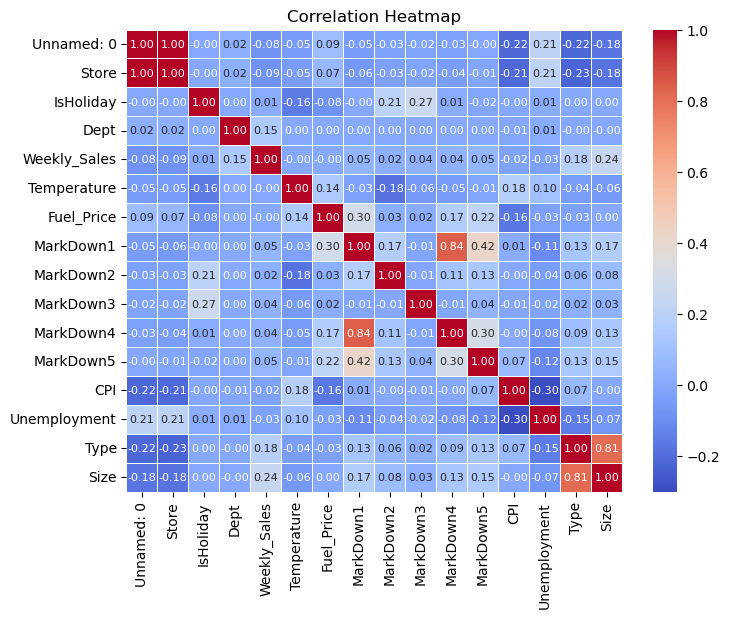

In [124]:
# Create the heatmap
plt.figure(figsize=(8, 6))  # Optional: Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

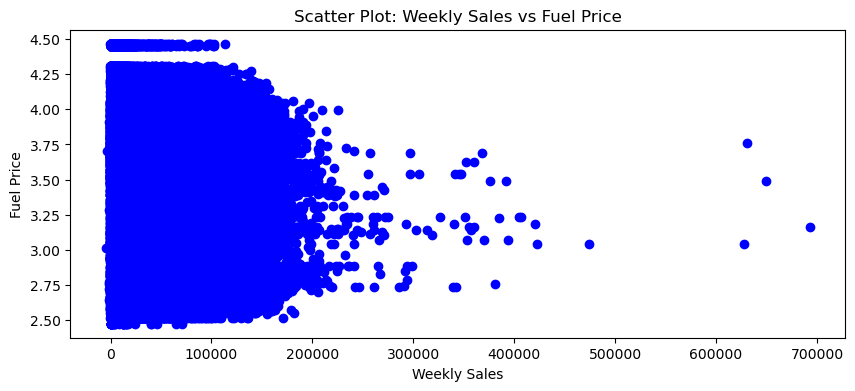

In [125]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Weekly_Sales'], df['Fuel_Price'], color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot: Weekly Sales vs Fuel Price')
plt.xlabel('Weekly Sales')
plt.ylabel('Fuel Price')

# Show the plot
plt.show()

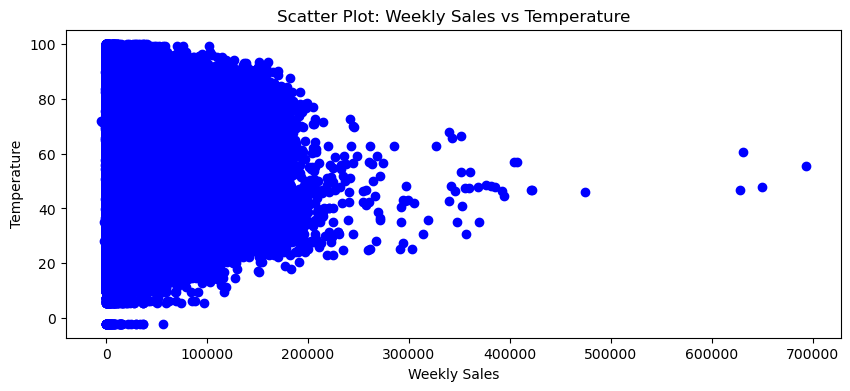

In [126]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Weekly_Sales'], df['Temperature'], color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot: Weekly Sales vs Temperature')
plt.xlabel('Weekly Sales')
plt.ylabel('Temperature')

# Show the plot
plt.show()

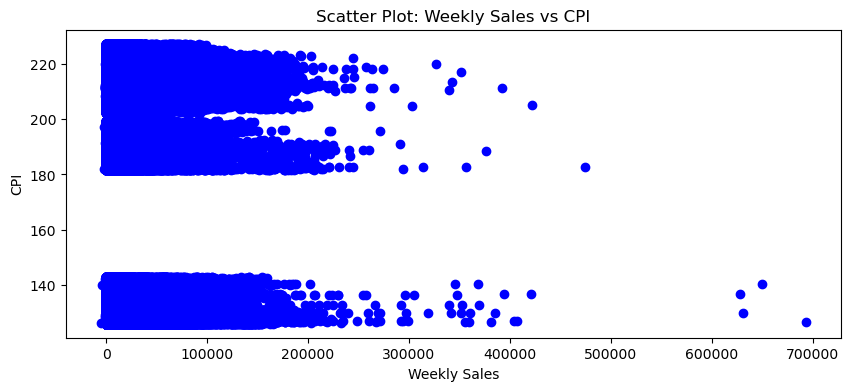

In [127]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Weekly_Sales'], df['CPI'], color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot: Weekly Sales vs CPI')
plt.xlabel('Weekly Sales')
plt.ylabel('CPI')

# Show the plot
plt.show()

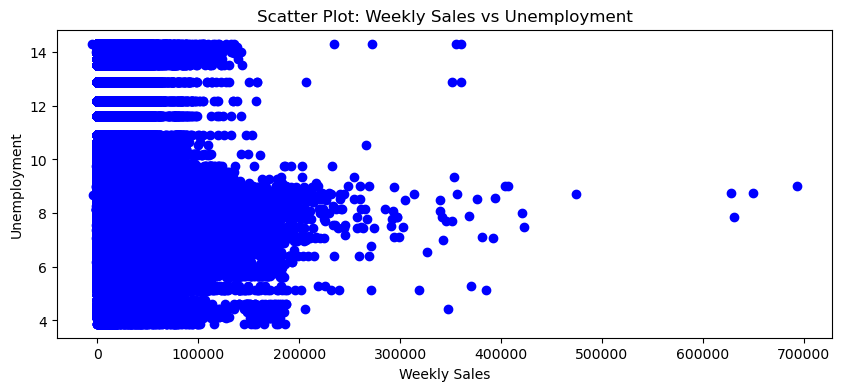

In [128]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Weekly_Sales'], df['Unemployment'], color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot: Weekly Sales vs Unemployment')
plt.xlabel('Weekly Sales')
plt.ylabel('Unemployment')

# Show the plot
plt.show()

## Data Visualization

In [129]:
m_sales = df.resample('M')['Weekly_Sales'].sum()

m_sales = m_sales.reset_index()

m_sales['Year'] = m_sales['Date'].dt.year
m_sales['Month'] = m_sales['Date'].dt.month

print(m_sales)

         Date  Weekly_Sales  Year  Month
0  2010-02-28  1.903330e+08  2010      2
1  2010-03-31  1.819198e+08  2010      3
2  2010-04-30  2.314124e+08  2010      4
3  2010-05-31  1.867109e+08  2010      5
4  2010-06-30  1.922462e+08  2010      6
5  2010-07-31  2.325801e+08  2010      7
6  2010-08-31  1.876401e+08  2010      8
7  2010-09-30  1.772679e+08  2010      9
8  2010-10-31  2.171618e+08  2010     10
9  2010-11-30  2.028534e+08  2010     11
10 2010-12-31  2.887605e+08  2010     12
11 2011-01-31  1.637040e+08  2011      1
12 2011-02-28  1.863313e+08  2011      2
13 2011-03-31  1.793564e+08  2011      3
14 2011-04-30  2.265265e+08  2011      4
15 2011-05-31  1.816482e+08  2011      5
16 2011-06-30  1.897734e+08  2011      6
17 2011-07-31  2.299114e+08  2011      7
18 2011-08-31  1.885993e+08  2011      8
19 2011-09-30  2.208477e+08  2011      9
20 2011-10-31  1.832613e+08  2011     10
21 2011-11-30  2.101624e+08  2011     11
22 2011-12-31  2.880781e+08  2011     12
23 2012-01-31  1

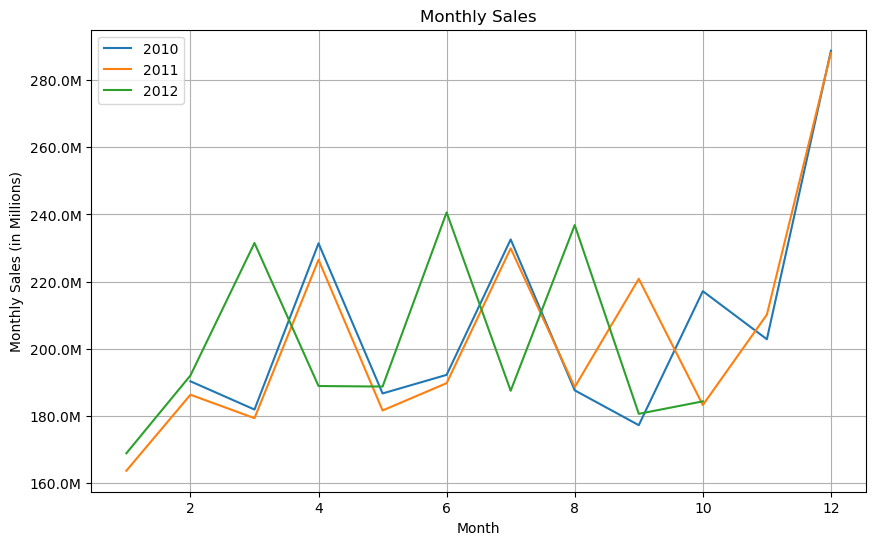

In [130]:
sales_2010=m_sales[(m_sales['Year']==2010)]
sales_2011=m_sales[(m_sales['Year']==2011)]
sales_2012=m_sales[(m_sales['Year']==2012)]

plt.figure(figsize=(10, 6))
plt.plot(sales_2010['Month'], sales_2010['Weekly_Sales'], label='2010')
plt.plot(sales_2011['Month'], sales_2011['Weekly_Sales'], label='2011')
plt.plot(sales_2012['Month'], sales_2012['Weekly_Sales'], label='2012')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Monthly Sales (in Millions)')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
merged_df = pd.merge(sales_2010, sales_2011, on='Month', how='right')
merged_df = pd.merge(merged_df, sales_2012, on='Month', how='left')

merged_df.rename(columns={'Date_x': 'Date_2010',
                          'Weekly_Sales_x': 'monthly_sales_2010',
                          'Date_y': 'Date_2011',
                          'Weekly_Sales_y': 'monthly_sales_2011',
                          'Date': 'Date_2012',
                          'Weekly_Sales': 'monthly_sales_2012',
                         }, inplace=True)
print(merged_df)

    Date_2010  monthly_sales_2010  Year_x  Month  Date_2011  \
0         NaT                 NaN     NaN      1 2011-01-31   
1  2010-02-28        1.903330e+08  2010.0      2 2011-02-28   
2  2010-03-31        1.819198e+08  2010.0      3 2011-03-31   
3  2010-04-30        2.314124e+08  2010.0      4 2011-04-30   
4  2010-05-31        1.867109e+08  2010.0      5 2011-05-31   
5  2010-06-30        1.922462e+08  2010.0      6 2011-06-30   
6  2010-07-31        2.325801e+08  2010.0      7 2011-07-31   
7  2010-08-31        1.876401e+08  2010.0      8 2011-08-31   
8  2010-09-30        1.772679e+08  2010.0      9 2011-09-30   
9  2010-10-31        2.171618e+08  2010.0     10 2011-10-31   
10 2010-11-30        2.028534e+08  2010.0     11 2011-11-30   
11 2010-12-31        2.887605e+08  2010.0     12 2011-12-31   

    monthly_sales_2011  Year_y  Date_2012  monthly_sales_2012    Year  
0         1.637040e+08    2011 2012-01-31        1.688945e+08  2012.0  
1         1.863313e+08    2011 2012-

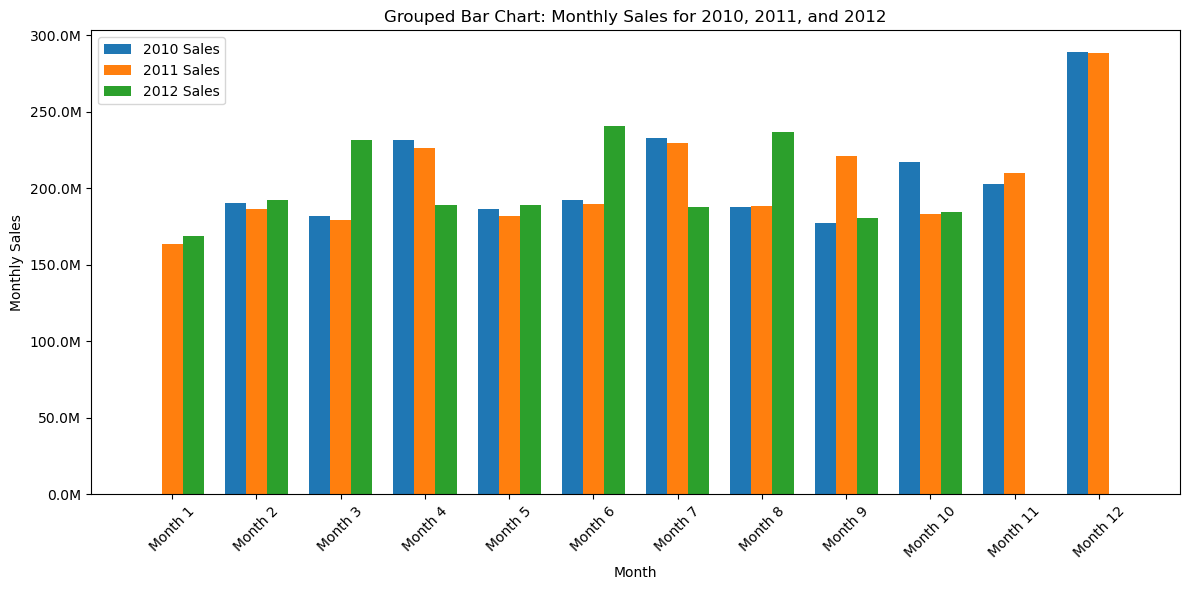

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure NaN values are replaced with 0 for plotting
merged_df['monthly_sales_2010'] = merged_df['monthly_sales_2010'].fillna(0)
merged_df['monthly_sales_2011'] = merged_df['monthly_sales_2011'].fillna(0)
merged_df['monthly_sales_2012'] = merged_df['monthly_sales_2012'].fillna(0)

# Prepare data
months = merged_df['Month']
sales_x = merged_df['monthly_sales_2010']
sales_y = merged_df['monthly_sales_2011']
sales_na = merged_df['monthly_sales_2012']

# Define bar positions
x = np.arange(len(months))  # Numerical positions for months
width = 0.25  # Width of each bar

# Plot bars
plt.figure(figsize=(12, 6))
plt.bar(x - width, sales_x, width=width, label='2010 Sales')
plt.bar(x, sales_y, width=width, label='2011 Sales')
plt.bar(x + width, sales_na, width=width, label='2012 Sales')

# Format y-axis as thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

# Customize the chart
plt.xticks(x, [f'Month {int(m)}' for m in months], rotation=45)
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Grouped Bar Chart: Monthly Sales for 2010, 2011, and 2012')
plt.legend()

plt.tight_layout()
plt.show()
